In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import svm
from xgboost import XGBClassifier


# Load datasets
df = pd.read_csv("kdd_train.csv")
test_df = pd.read_csv("kdd_test.csv")

df = pd.concat([df, test_df], ignore_index=True)
df1 = df.copy()

In [2]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'labels'],
      dtype='object')

In [3]:
df['labels'].unique()

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl', 'apache2', 'mscan', 'httptunnel',
       'processtable', 'mailbomb', 'snmpguess', 'saint', 'snmpgetattack',
       'xsnoop', 'ps', 'xterm', 'sendmail', 'xlock', 'named'],
      dtype=object)

In [4]:
# Define columns
cols = df['labels'].unique()
cols


array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl', 'apache2', 'mscan', 'httptunnel',
       'processtable', 'mailbomb', 'snmpguess', 'saint', 'snmpgetattack',
       'xsnoop', 'ps', 'xterm', 'sendmail', 'xlock', 'named'],
      dtype=object)

Preprocessing for Binary Classification

In [5]:
df['labels'].replace(to_replace=cols[1:],value="intrusion", inplace = True)
df.head() 

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,intrusion
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


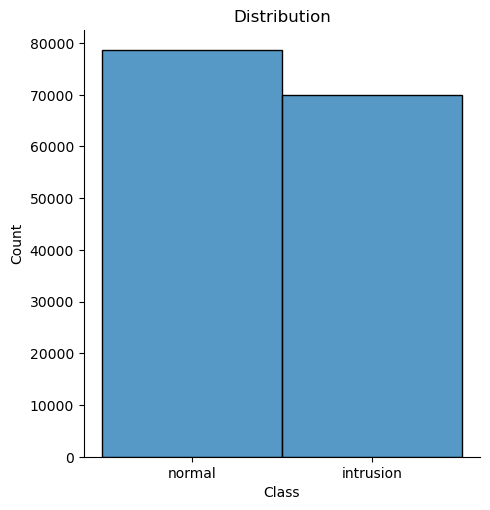

In [6]:
sns.displot(df, x='labels', kind='hist')
plt.xlabel("Class")
plt.title("Distribution")
plt.show()

In [7]:
cat_features = df.select_dtypes(include='object').columns
cat_features

Index(['protocol_type', 'service', 'flag', 'labels'], dtype='object')

In [8]:
cols = ['protocol_type','service','flag','labels']

for col in cols:
    en = LabelEncoder()

    df[col] = en.fit_transform(df[col])

class_names = en.classes_

In [9]:
X = df.drop(['labels'], axis=1)
y = df['labels']

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=13)

Use predetermined important features (from ExtraTreesRegressor in IAS_draft1)

In [10]:
columns=['same_srv_rate', 'flag', 'protocol_type', 'dst_host_same_srv_rate',
       'logged_in', 'dst_host_same_src_port_rate', 'service',
       'dst_host_srv_count', 'dst_host_rerror_rate', 'src_bytes',
       'wrong_fragment', 'hot', 'dst_host_count', 'count',
       'dst_host_diff_srv_rate', 'dst_host_srv_serror_rate', 'dst_bytes',
       'dst_host_srv_diff_host_rate', 'srv_count', 'serror_rate',
       'num_compromised', 'dst_host_srv_rerror_rate', 'is_guest_login',
       'dst_host_serror_rate', 'duration', 'srv_rerror_rate', 'rerror_rate',
       'srv_serror_rate', 'diff_srv_rate', 'num_failed_logins']
#Continue our model with only top 30 features

X_train=X_train[columns]
X_test=X_test[columns]

In [11]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Training RF and KNN Models for Binary Classification

In [12]:
#Train random forest model

rfc = RandomForestClassifier(random_state=13, n_estimators=100)
rfc.fit(X_train, y_train)

y_pred_rfc = rfc.predict(X_test)

# RF Model evaluation
accuracy = accuracy_score(y_test, y_pred_rfc)
class_report = classification_report(y_test, y_pred_rfc, target_names=class_names)

print("Accuracy:", accuracy)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.9976770805278751

Classification Report:
              precision    recall  f1-score   support

   intrusion       1.00      1.00      1.00     13970
      normal       1.00      1.00      1.00     15734

    accuracy                           1.00     29704
   macro avg       1.00      1.00      1.00     29704
weighted avg       1.00      1.00      1.00     29704



In [13]:
#Train KNN model

knn = KNeighborsClassifier(n_neighbors=100)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

# KNN Model evaluation
accuracy = accuracy_score(y_test, y_pred_knn)
class_report = classification_report(y_test, y_pred_knn, target_names=class_names)

print("Accuracy:", accuracy)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.9858604901696741

Classification Report:
              precision    recall  f1-score   support

   intrusion       0.99      0.98      0.98     13970
      normal       0.99      0.99      0.99     15734

    accuracy                           0.99     29704
   macro avg       0.99      0.99      0.99     29704
weighted avg       0.99      0.99      0.99     29704



In [14]:
#AdaBoost classifier

ada = AdaBoostClassifier(random_state=13, n_estimators=100)
ada.fit(X_train, y_train)

y_pred_ada = ada.predict(X_test)

# AdaBoost model evaluation
accuracy = accuracy_score(y_test, y_pred_ada)
class_report = classification_report(y_test, y_pred_ada, target_names=class_names)

print("Accuracy:", accuracy)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.9849515216805818

Classification Report:
              precision    recall  f1-score   support

   intrusion       0.99      0.98      0.98     13970
      normal       0.98      0.99      0.99     15734

    accuracy                           0.98     29704
   macro avg       0.99      0.98      0.98     29704
weighted avg       0.98      0.98      0.98     29704



In [15]:
# XGBoost
xgb = XGBClassifier(n_estimators=100, eval_metric='logloss', random_state=13)
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

# XGBoost model evaluation
accuracy = accuracy_score(y_test, y_pred_xgb)
class_report = classification_report(y_test, y_pred_xgb, target_names=class_names)

print("Accuracy:", accuracy)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.9979464045246431

Classification Report:
              precision    recall  f1-score   support

   intrusion       1.00      1.00      1.00     13970
      normal       1.00      1.00      1.00     15734

    accuracy                           1.00     29704
   macro avg       1.00      1.00      1.00     29704
weighted avg       1.00      1.00      1.00     29704



Preprocessing for Multi-Class Classification

In [16]:
def others(df):
    counts = df['labels'].value_counts()
    labels_to_replace = counts[counts <= 100].index

    df['labels'] = df['labels'].replace(labels_to_replace, 'Other')
    return df

df2 = others(df1.copy())

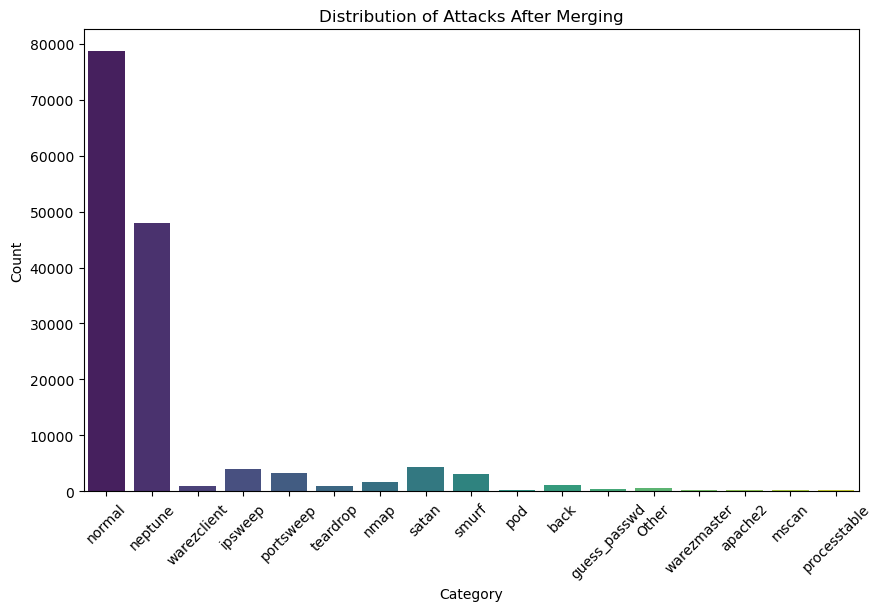

normal          78588
neptune         47868
satan            4331
ipsweep          4078
portsweep        3302
smurf            3186
nmap             1699
back             1183
warezclient       997
teardrop          996
Other             541
guess_passwd      464
mscan             310
warezmaster       299
pod               236
apache2           228
processtable      211
Name: labels, dtype: int64

In [17]:
plt.figure(figsize=(10, 6))
sns.countplot(x='labels', data=df2, palette='viridis')
plt.title('Distribution of Attacks After Merging')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
(df2['labels'].value_counts())

In [18]:
cat_features = df2.select_dtypes(include='object').columns
cat_features

Index(['protocol_type', 'service', 'flag', 'labels'], dtype='object')

In [19]:
df2['labels'].unique()

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'Other', 'warezmaster', 'apache2', 'mscan',
       'processtable'], dtype=object)

In [20]:
cols = ['protocol_type','service','flag','labels']

for col in cols:
    en = LabelEncoder()

    df2[col] = en.fit_transform(df2[col])

class_names = en.classes_

In [21]:
X = df2.drop(["labels"], axis=1)
y = df2["labels"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13, stratify=y)

In [22]:

columns=['same_srv_rate', 'flag', 'protocol_type', 'dst_host_same_srv_rate',
       'logged_in', 'dst_host_same_src_port_rate', 'service',
       'dst_host_srv_count', 'dst_host_rerror_rate', 'src_bytes',
       'wrong_fragment', 'hot', 'dst_host_count', 'count',
       'dst_host_diff_srv_rate', 'dst_host_srv_serror_rate', 'dst_bytes',
       'dst_host_srv_diff_host_rate', 'srv_count', 'serror_rate',
       'num_compromised', 'dst_host_srv_rerror_rate', 'is_guest_login',
       'dst_host_serror_rate', 'duration', 'srv_rerror_rate', 'rerror_rate',
       'srv_serror_rate', 'diff_srv_rate', 'num_failed_logins']
#Continue model with top 30 features

X_train=X_train[columns]
X_test=X_test[columns] 

In [23]:

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Training RF and KNN Models for Multi-Class Classification

In [24]:
#Train random forest model

rfc = RandomForestClassifier(random_state=13, n_estimators=100)
rfc.fit(X_train, y_train)

y_pred_rfc = rfc.predict(X_test)

# RF Model evaluation
accuracy = accuracy_score(y_test, y_pred_rfc)
class_report = classification_report(y_test, y_pred_rfc, target_names=class_names)

print("Accuracy:", accuracy)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.9971384325343388

Classification Report:
              precision    recall  f1-score   support

       Other       0.89      0.74      0.81       108
     apache2       1.00      1.00      1.00        46
        back       1.00      1.00      1.00       237
guess_passwd       1.00      0.94      0.97        93
     ipsweep       1.00      1.00      1.00       816
       mscan       1.00      0.98      0.99        62
     neptune       1.00      1.00      1.00      9574
        nmap       0.99      0.99      0.99       340
      normal       1.00      1.00      1.00     15718
         pod       0.96      1.00      0.98        47
   portsweep       0.99      1.00      1.00       660
processtable       1.00      1.00      1.00        42
       satan       0.98      0.99      0.99       866
       smurf       1.00      1.00      1.00       637
    teardrop       0.99      1.00      0.99       199
 warezclient       1.00      0.98      0.99       199
 warezmaster       1.00     

In [25]:
#Train KNN model

knn = KNeighborsClassifier(n_neighbors=100)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

# KNN Model evaluation
accuracy = accuracy_score(y_test, y_pred_knn)
class_report = classification_report(y_test, y_pred_knn, target_names=class_names)

print("Accuracy:", accuracy)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.980810665230272

Classification Report:
              precision    recall  f1-score   support

       Other       0.70      0.24      0.36       108
     apache2       0.80      0.89      0.85        46
        back       0.91      0.96      0.93       237
guess_passwd       0.75      0.65      0.69        93
     ipsweep       0.94      0.96      0.95       816
       mscan       0.87      0.42      0.57        62
     neptune       1.00      1.00      1.00      9574
        nmap       0.87      0.94      0.90       340
      normal       0.98      0.99      0.99     15718
         pod       0.96      0.98      0.97        47
   portsweep       0.94      0.97      0.96       660
processtable       1.00      0.81      0.89        42
       satan       0.95      0.94      0.94       866
       smurf       0.98      1.00      0.99       637
    teardrop       0.98      0.99      0.98       199
 warezclient       0.91      0.83      0.87       199
 warezmaster       0.86      

In [26]:

#AdaBoost model
ada = AdaBoostClassifier(random_state=13, n_estimators=100)
ada.fit(X_train, y_train)

y_pred_ada = ada.predict(X_test)

# AdaBoost model evaluation
accuracy = accuracy_score(y_test, y_pred_ada)
class_report = classification_report(y_test, y_pred_ada, target_names=class_names, zero_division=0)

print("Accuracy:", accuracy)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.8330191220037705

Classification Report:
              precision    recall  f1-score   support

       Other       0.00      0.00      0.00       108
     apache2       0.00      0.00      0.00        46
        back       0.00      0.00      0.00       237
guess_passwd       0.00      0.00      0.00        93
     ipsweep       0.00      0.00      0.00       816
       mscan       0.00      0.00      0.00        62
     neptune       0.87      0.97      0.92      9574
        nmap       0.00      0.00      0.00       340
      normal       0.81      0.97      0.88     15718
         pod       0.00      0.00      0.00        47
   portsweep       0.00      0.00      0.00       660
processtable       0.00      0.00      0.00        42
       satan       0.00      0.00      0.00       866
       smurf       0.00      0.00      0.00       637
    teardrop       0.79      1.00      0.88       199
 warezclient       0.00      0.00      0.00       199
 warezmaster       0.00     

In [27]:
# XGBoost
xgb = XGBClassifier(n_estimators=100, eval_metric='logloss', random_state=13)
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

# XGBoost model evaluation
accuracy = accuracy_score(y_test, y_pred_xgb)
class_report = classification_report(y_test, y_pred_xgb, target_names=class_names)

print("Accuracy:", accuracy)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.9979464045246431

Classification Report:
              precision    recall  f1-score   support

       Other       0.90      0.81      0.85       108
     apache2       1.00      1.00      1.00        46
        back       1.00      1.00      1.00       237
guess_passwd       1.00      0.99      0.99        93
     ipsweep       1.00      1.00      1.00       816
       mscan       1.00      0.98      0.99        62
     neptune       1.00      1.00      1.00      9574
        nmap       0.99      0.99      0.99       340
      normal       1.00      1.00      1.00     15718
         pod       0.94      1.00      0.97        47
   portsweep       1.00      1.00      1.00       660
processtable       1.00      1.00      1.00        42
       satan       0.99      0.99      0.99       866
       smurf       1.00      1.00      1.00       637
    teardrop       0.98      1.00      0.99       199
 warezclient       1.00      1.00      1.00       199
 warezmaster       1.00     